# Tejas A

# Task 1

## Object Detection / Optical Character

### Recognition (ORC) (Level - Beginner)

● Implement an object detector which identifies the classes of the objects in
an image or video.

OR

● Character detector which extracts printed or handwritten text from an
image or video.


### About Open CV 


OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

Importing the weights from the dnn model given by the open cv2

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        #classLabels.append(fpt.read())

Below is a function  that helps to plot the boxes on the object and naming it.

In [4]:
def out(img):
    classIndex, confidece, bbox = model.detect(img,confThreshold=0.5)
    font_scale = 1
    font = cv2.FONT_HERSHEY_PLAIN
    for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
        cv2.rectangle(img,boxes,(255, 0, 0), 2 )
        cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Loading the images and plotting it with help of matplotlib

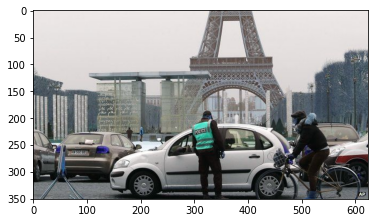

In [5]:
img = cv2.imread('trafficpicture.jpg')
plt.imshow(img)

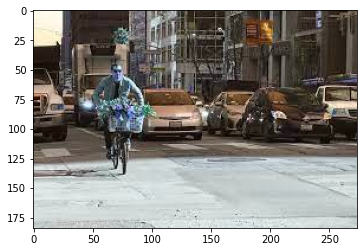

In [6]:
img1 = cv2.imread('image.jfif')
plt.imshow(img1)


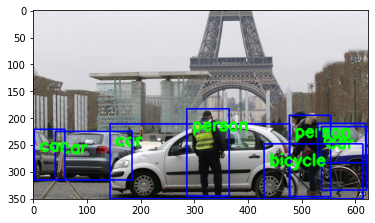

In [7]:
out(img)

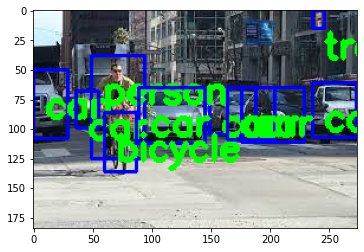

In [8]:
out(img1)

Above we can see that the objects are being identified and a box is ploted around it and it has been named

### Below is the code for detection of the object in the video.

In [9]:
cap = cv2.VideoCapture("trafficvideo.mp4")

if not cap.isOpened():
    cap=cv2.videocapture(0)
if not cap.isOpened():
    raise IOerror("cannot open video")

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex , confidence , bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0) :
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    cv2.imshow('Object Detection Tutorial ' , frame)

    if cv2.waitKey(2) & 0XFF == ord('q'):
        break

cap.realase()
cv2.destroyAllWindows() 

[[1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 2]
 [ 2]]
[[ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 1]]
[[ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]]
[[3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]


[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]]
[[1]
 [3]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [1]]
[[3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


## OCR ussing Tesseract

OCR = Optical Character Recognition. In other words, OCR systems transform a two-dimensional image of text, that could contain machine printed or handwritten text from its image representation into machine-readable text. OCR as a process generally consists of several sub-processes to perform as accurately as possible. The subprocesses are:

    Preprocessing of the Image
    Text Localization
    Character Segmentation
    Character Recognition
    Post Processing

The sub-processes in the list above of course can differ, but these are roughly steps needed to approach automatic character recognition. In OCR software, it’s main aim to identify and capture all the unique words using different languages from written text characters.

For almost two decades, optical character recognition systems have been widely used to provide automated text entry into computerized systems. Yet in all this time, conventional OCR systems have never overcome their inability to read more than a handful of type fonts and page formats. Proportionally spaced type (which includes virtually all typeset copy), laser printer fonts, and even many non-proportional typewriter fonts, have remained beyond the reach of these systems. And as a result, conventional OCR has never achieved more than a marginal impact on the total number of documents needing conversion into digital form.


Tesseract - an open-source OCR engine that has gained popularity among OCR developers. Even though it can be painful to implement and modify sometimes, there weren’t too many free and powerful OCR alternatives on the market for the longest time. Tesseract began as a Ph.D. research project in HP Labs, Bristol. It gained popularity and was developed by HP between 1984 and 1994. In 2005 HP released Tesseract as an open-source software. Since 2006 it is developed by Google.

In [12]:
pytesseract.pytesseract.tesseract_cmd = 'D:\\Softwares\\tesseract\\tesseract.exe'

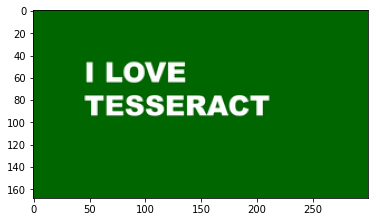

In [13]:
img = cv2.imread('OCR-300x168.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [14]:
plt.close()
print(pytesseract.image_to_string(img))

| LOVE
TESSERACT



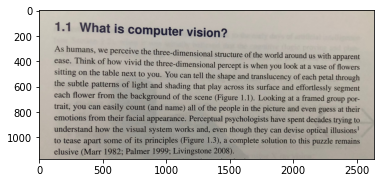

In [15]:
img1 = cv2.imread('computer-vision.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
plt.imshow(img1)
plt.show()

In [16]:
print(pytesseract.image_to_string(img1))

1.1 What is computer vision?

As humans, We perceive the three-dimensional structure of the world around us with apparent
ease. Think of how vivid the three-dimensional percept is when you look at a vase of flowers
sitting on the table next to you. You can tell the shape and translucency of each petal through
the subtle patterns of light and Shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait, you can easily count (and name) all of the people in the picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though they can devise optical illusions!
to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008).



From the above message we can see that the tesseract has converted the characters from the images into text.